In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

###
# Name: Enea DOdi
# Student ID: 2296306
# Email: dodi@chapman.edu
# Course: PHYS220/MATH220/CPSC220 Fall 2018
# Assignment: c209
###

def gradient(x):
        """gradient function
        Args: x - input numpy array consiting of a set of n domain points.
        Returns: a n by n matrix creating a finite difference linear operator"""
        dx = x[1]-x[0] #dx should be a very small number
        ones = np.ones(x.size-1) #an array contiang just ones, which will be the values placed in the gradient
        diag1 = np.diag(-1*ones,-1) #The negative one which will represent (fi - 1)
        diag2 = np.diag(ones,1)#Postive integer one which will represent (fi - 1)
        gradient = diag1+diag2
        
        #The parts of the gradient where central difference cannot be used
        gradient[0][0] = -2 
        gradient[0][1] = 2
        gradient[-1][-2] = -2
        gradient[-1][-1] = 2
        
        return np.divide(gradient,2*dx)

def deriv(x,f):
    """deriv function
    Args: x - input numpy array consisting of a set of n domain points
          f - function which the derivative will be calculated from
          Returns: DerivY - the y values of the derivative"""
    func = np.vectorize(f)
    yVals = func(x) #Get y values of the domain points after function f is applied to them
    #derivative creation!
    D = gradient(x)
    DerivY = D@yVals
    #Return the y values of the derivative.
    return DerivY

def deriv_vs_normal_plot(x,f,name):
        """deriv_vs_normal_plot(x,f)
        Args: x - input numpy array consisting of a set of n domain points
        f - function which the derivtive will be calculated from
        Returns: nothing but returns 3 graphs, one which is simply the function f(x), 
        the other is simply the derivative f'(x), and the third is a graph with both the 
        plotting of the functino f(x) and f'(x)"""
        Df = deriv(x,f)
        titl = name+"(x)"
        titl_deriv = name + "'(x)"
        func = np.vectorize(f)
        yVal = func(x)
        s = plt.figure(figsize=(8,6))
        a = plt.axes()
        a.plot(x,yVal, color = "blue")
        a.set(xlabel= "X values", ylabel= "Y values", title=titl)
        plt.show()
        s = plt.figure(figsize=(8,6))
        a = plt.axes()
        a.plot(x,Df, color = "red")
        a.set(xlabel= "X values", ylabel= "Y values", title=titl_deriv)
        plt.show()
        s = plt.figure(figsize=(8,6))
        a = plt.axes()
        a.plot(x,yVal, color = "blue")
        a.plot(x,Df,color = "red")
        a.set(xlabel= "X values", ylabel= "Y values", title=titl + " vs " +titl_deriv)
        plt.show()
        

# PHYS220/MATH220/CPSC220 CW 11

**Author(s):** **CHANGEME**

## Specification

This week we will continue the classwork from last week and implement the methods that you analyzed.

1. Finish CW 10.

1. Consider the coupled set of ODEs with initial conditions $x(0) = 1$, $v(0) = 0$:
   
   $$x'(t) = v(t)$$
   $$v'(t) = -x(t)$$
   
   Show analytically that the solution $x(t) = \cos(t)$ and $v(t) = -\sin(t)$ satisfies these equations. What could $u(t)$ and $v(t)$ model in a physical system? 
   
1. First, we outline how to think about this problem analytically. Note that you can represent such a coupled system as a _vector_ ODE as follows:
   
   $$\vec{r}'(t) = \hat{J}\vec{r}$$
   
   where $\vec{r}(t) = [x(t), v(t)]$ is a column vector with initial condition $\vec{r}(0) = [1,0]$, such that the coordinates are coupled by an antisymmetric matrix (meaning its transpose equals its negative):
   
   $$\hat{J} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$
   
   Written in this form, we can think of the coupled system as being in the form $\vec{r}'(t) = \vec{f}[t, \vec{r}(t)]$ where the right-hand-side is a vector-valued function that gives the slope. Here the function $\vec{f}$ is a _linear transformation_ of $\vec{r}$, which is why it can be completely specified by a matrix. Note that this form has the same basic structure as in CW 10, where we wrote $u'(t) = f[t, u(t)]$, except now $u$ has two components as a vector. This means that all methods of computing the solution numerically will work unchanged, just with vectors instead of just scalars.
   
   As a side note, we can get an analytic solution using the vector and matrix way of thinking in a neat way. Note that the vector equation states that the derivative is proportional to itself. This statement is usually satisfied by an exponential solution, so we can guess the solution $\vec{r}(t) = \exp(t\hat{J})\vec{r}(0)$. To understand what the exponential of a matrix means, we can use the Taylor expansion, $\exp(t\hat{J}) = \sum_{n=0}^\infty (t\hat{J})^n/n!$, since all products of a matrix with itself are well-defined. We can then exploit the fact that $\hat{J}^2 = -\hat{I}$, where $\hat{I}$ is the 2x2 identity matrix, to simplify this Taylor expansion. All even powers become the identity $\hat{I}$ with alternating signs, while all odd powers become $\hat{J}$ with alternating signs. Hence we can separate the even and odd terms in the sum to find $\exp(t\hat{J}) = \hat{I}\sum_{n=0}^\infty t^{2n}(-1)^n/(2n)! + \hat{J}\sum_{n=1}^\infty t^{2n-1}(-1)^{n-1}/(2n-1)! = \hat{I}\cos(t) + \hat{J}\sin(t)$, where the Taylor expansions of cosine and sine have been identified. (If you are a math person, you will immediately recognize that we have just derived a 2x2 matrix incarnation of the famous Euler identity $\exp(i\theta) = \cos(\theta) + i\sin(\theta)$, where $i^2 = -1$.) Applying this matrix solution to the initial condition $\vec{r}(0)$ recovers the expected solution for each component, as you already checked above. This analytic derivation tells you what you expect to find when you solve the problem numerically below.
   
1. Using Euler's method, solve the above equations from $t=0$ until $t= 5(2\pi)$ using $N$ time steps per period (so $\Delta t = 2\pi / N$). What is the smallest integer value of $N$ that produces the qualitatively correct behavior of the solution over the solution interval? For 3 different choices of $N$, plot your simulated solution as a solid line on top of the exact solution as a dashed line for both $x(t)$ and $v(t)$. Be sure to annotate your plot with title, legend for the curves, and proper axes labels. 
   
1. Repeat using Heun's method. How does the smallest $N$ compare to Euler's method?
   
1. Repeat using the 2nd-order Runge Kutta method. How does the smallest $N$ compare to Euler's method?
   
1. Repeat using the 4th-order Runge Kutta method. How does the smallest $N$ compare to Euler's method?

1.  Code each method above in a separate module `odes.py` that you import into a notebook `cw11.ipynb` to create the plots and discuss. Each method should be contained in a single function that takes the initial condition vector `r0 = np.array([1,0])` and an integer `N` as arguments and returns a 2x(5N) array containing the solution. 

## Assessment

Analyze in this section what you found useful about this assignment in your own words. Include any lingering questions or comments that you may have. You can use the GitHub web interface to edit this file directly for now.

**CHANGEME**

## Honor Pledge

I pledge that all the work in this repository is my own with only the following exceptions:

* Content of starter files supplied by the instructor;
* Code borrowed from another source, documented with correct attribution in the code and summarized here.

Signed,

**YOURNAMES**


In [107]:

def u(t):
    return np.array([np.cos(t),-1*np.sin(t)])

def derivSandC(x,v):
    return np.array([v,-x])

def derivu(t):
    J = np.zeros((2,2))
    J[0][0] = 0
    J[0][1] = 1
    J[1][0] = -1
    J[1][1] = 0
    return J@u(t)

def derivuTU(tk,uk):
    J = np.zeros((2,2))
    J[0][0] = 0
    J[0][1] = 1
    J[1][0] = -1
    J[1][1] = 0
    u = np.array([np.cos(tk),-1*np.sin(uk)])
    return J@u

def x(t):
    return np.cos(t)

def y(u):
    return -1*np.sin(u)

def eulers(N):
    t = np.linspace(0,10*np.pi,N)
    dt = t[1]-t[0]
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = 1
    y[0] = 0
    for i in range(1,len(t)):
        theDerivs = derivu(t[i-1])
        x[i] = x[i-1] + dt*theDerivs[0]
        y[i] = y[i-1] + dt*theDerivs[1]
    #u=np.array([x,y])
    s = plt.figure(figsize=(8,6))
    a = plt.axes()
    a.plot(t, x, color = "blue")
    a.plot(t,y,color = "red")
    plt.show()
    return x

def Heun(N):
    t = np.linspace(0,10*np.pi,N)
    dt = t[1]-t[0]
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = 1
    y[0] = 0
    for i in range(1,len(t)):
        theDerivs_two = derivu(t[i-1])
        theDerivs_one = derivu(t[i])
        x[i] = x[i-1] + (dt/2)*(theDerivs_two[0] + theDerivs_one[0])
        y[i] = y[i-1] + (dt/2)*(theDerivs_two[1] + theDerivs_one[1])
    s = plt.figure(figsize=(8,6))
    a = plt.axes()
    a.plot(t, x, color = "blue")
    a.plot(t,y,color = "red")
    plt.show()
    return x
        
def secondOrderRungeKutta(N):
    t = np.linspace(0,10*np.pi,N)
    dt = t[1]-t[0]
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0] = 1
    y[0] = 0
    for i in range(1,len(t)):
        K1 = dt*derivu(t[i-1])
        K21 = dt*derivu(t[i-1]+dt/2)
        K22 = dt*derivu(t[i-1]+K1[1]/2)
        x[i] = (x[i-1] + K21[0])
        y[i] = (y[i-1] + K22[1])
    s = plt.figure(figsize=(8,6))
    a = plt.axes()
    a.plot(t, x, color = "blue")
    a.plot(t,y,color = "red")
    plt.show()
    return 
    

   $K_1 = \Delta t\, f[t_k, u_k]$, 
   
   $K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2]$  

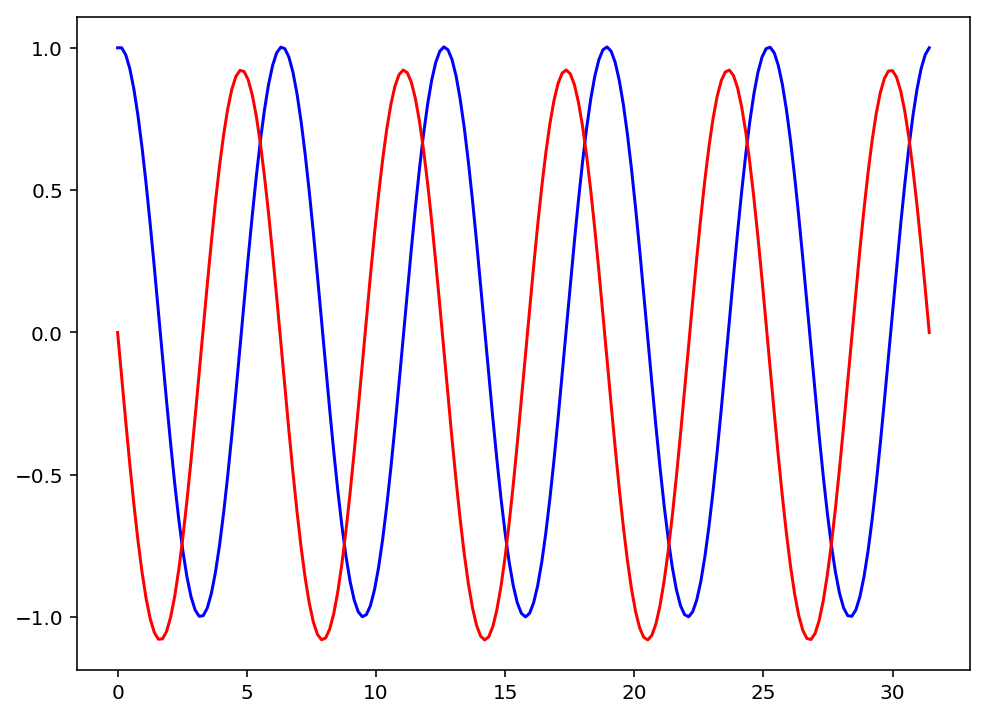

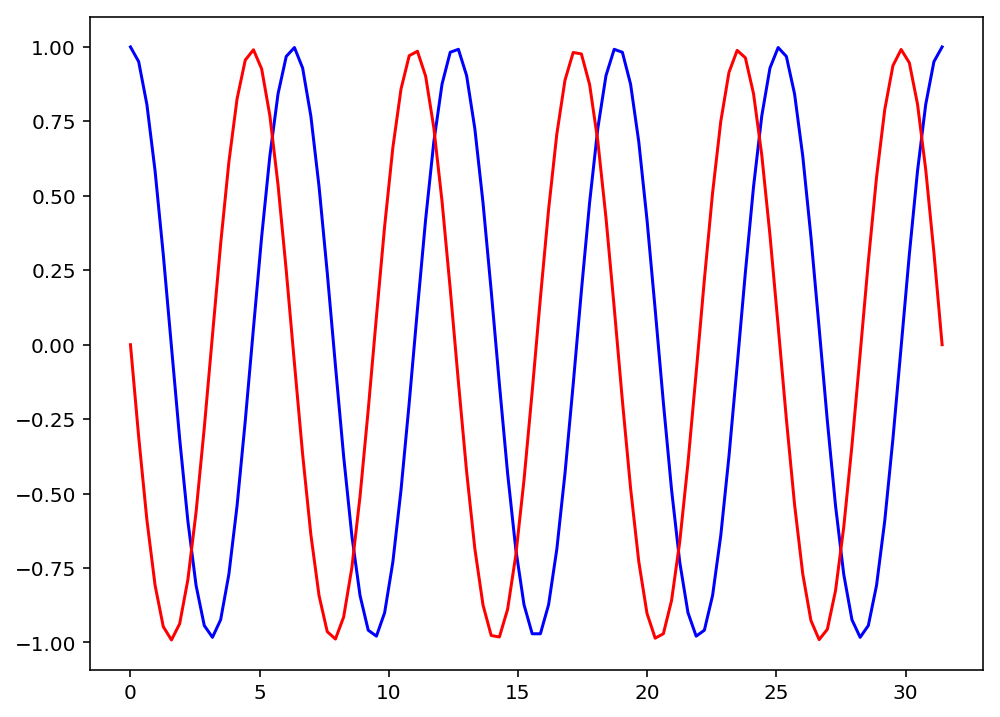

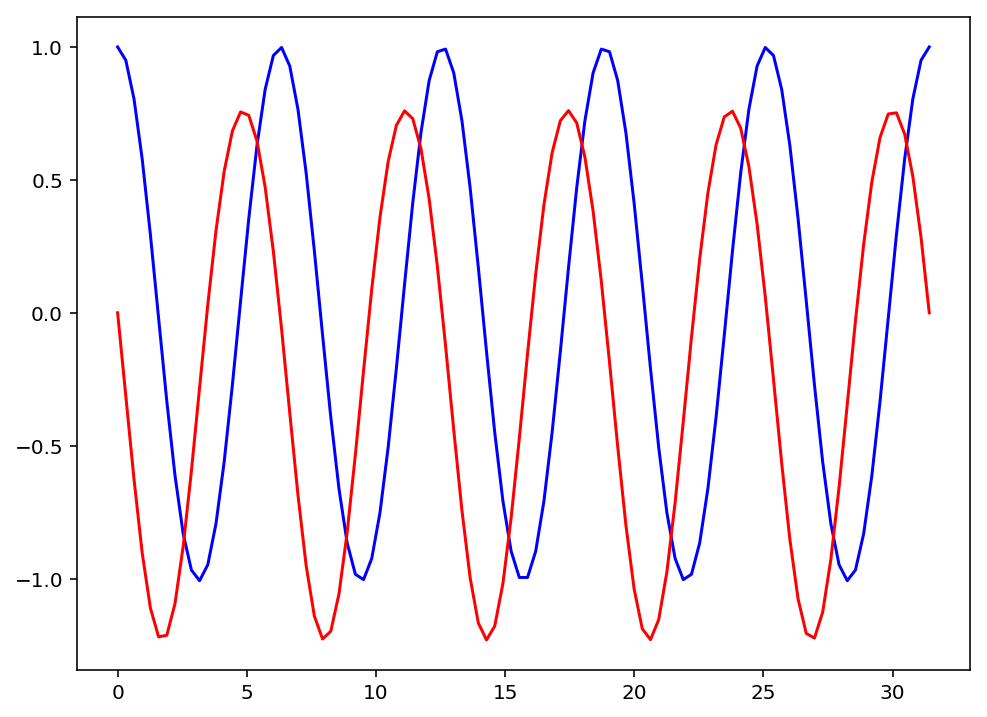

In [108]:
eulers(200)
Heun(100)
secondOrderRungeKutta(100)